<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/pyTorch/006_logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

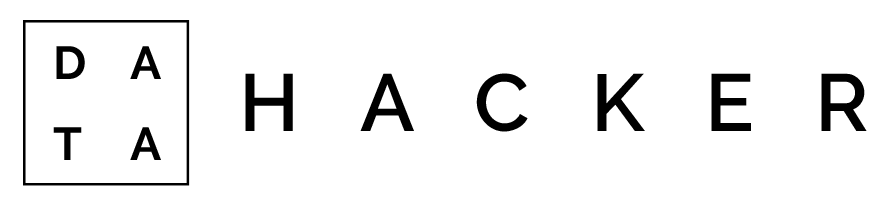
# Logistic regression using PyTorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## Simple example

We will create an array of vectors, each vector will consist of two values, `x1` and `x2`. By looking at the plot below we can see that we can visually separate these points into two groups or "classes". We can say the data points above 0 will be one class and the others will be the other class. 

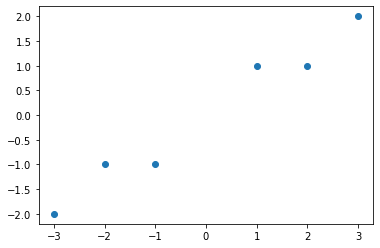

In [ ]:
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1, 1],[2,1],[3,2]])
plt.scatter(X[:,0],X[:,1])

We can even define a line that separates these two classes. If we recall what we learned in the previous tutorial about linear regression, the equation should look like this:\
$ x2 = kx_1 + n $\
If this equation is not familiar to you, I recommend you check out the [tutorial](https://www.youtube.com/watch?v=Fdh6YnDm2xE&t=682s)  on how to implement linear regression, .\
Continuing, if we take $k$ to be -1 and $n$ to be 1, we will get an equation that looks like this:\
$x2 = -x1 + 1 $
The way we are going to define this line in Python is the following. We will define an array of values ranging from `[-3, 3]` and we will calculate `x2` based on those values using the formula above.

In [ ]:
x1 = np.linspace(-3, 3, 50)
x2 = -1.0 * x1 + 1

By plotting this line we can see that we have separated these two classes. But, this line was arbitrarily chosen, and it is not an optimal one.

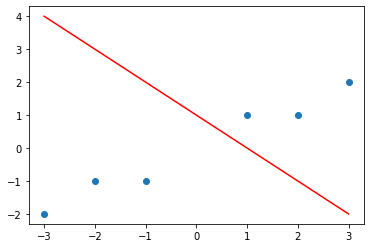

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.plot(x1, x2,'r')

Next, we can test the values of our function and write an equation of the line:\
$x2 = -x1 + 1$\
We can then rewrite it like this:\
$x1 + x2 - 1 = 0$\
And then write it in the form of a function `f`:\
$f(x1, x2) = x1 + x2 - 1$

We can then use it to determine whether a new data point belongs to class 1 or 2. For example, we have a new data point `[1, 1]` and we plug it in the function:\
$ f(1, 1) = 1 + 1 - 1 = 1$\
The result is 1 which means that it is bigger than 0 and it belongs to class 1. 

This is the essence of machine learning, the parameters of the function need to be calculated. The parameters for this function are `k` and `n`. Then, new data is used for evaluation of the function, and we get the classification results by analyzing this value and examining if it is greater than zero or less. 

### What is the main goal of this model?
The main goal is to separate a set of numbers into two classes. How can we achieve this?\
We will use the linear model that we have talked about in the previous tutorial and plug in a `sigmoid` function. This function will predict 0 and 1 instead of real numbers. It is a type of activation function that restricts the output to a range between 0 and 1.

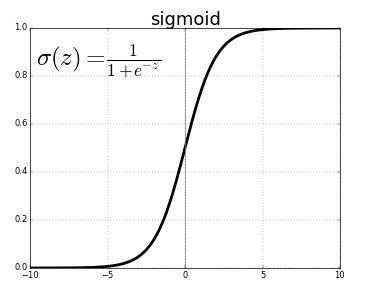

###What loss function are we going to use for this problem?
We will be using the `cross-entropy loss function`. It measures the performance of a classification model whose output is a probability value between 0 and 1.

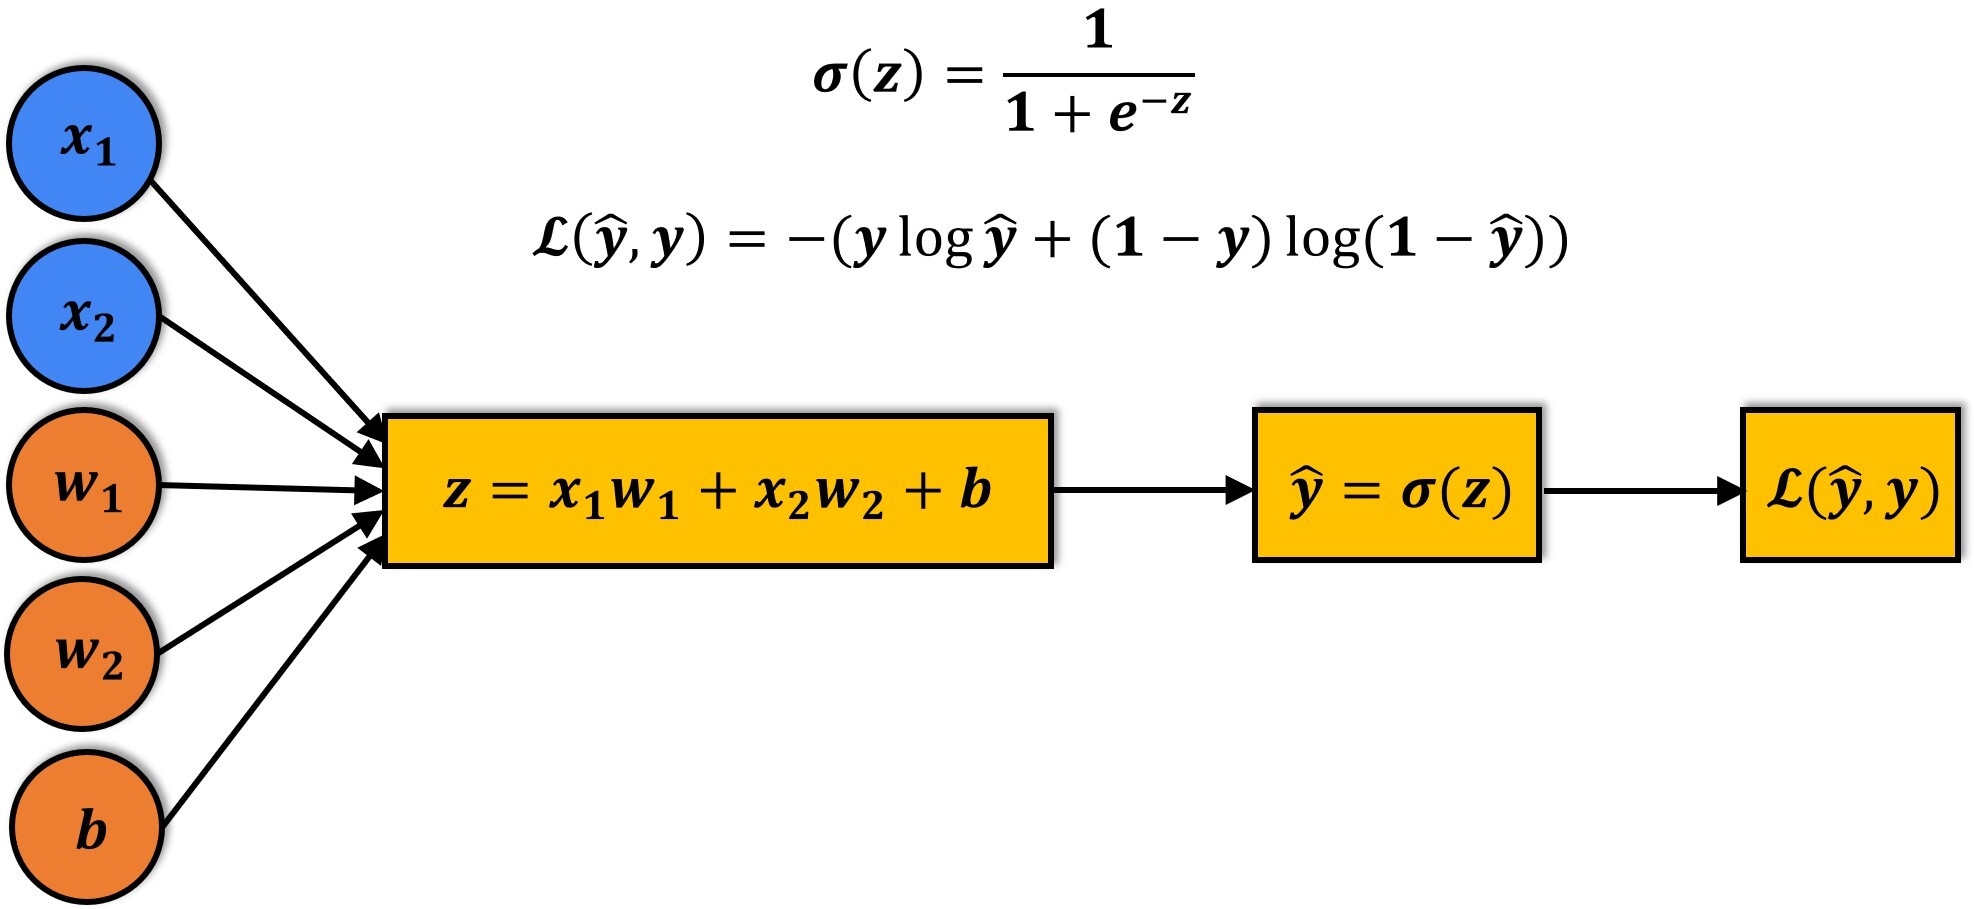

### Logistic Regression in PyTorch

We will create two blobs of data, class 0 and class 1. These values will be randomly generated using a function `make_blobs` from `sklearn`. We will choose 200 samples for each of the classes, and set `cluster_std` parameter to `1.4`, so that the data is not completely separated. We also need to convert the data from numpy array to tensors.

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
x, y = make_blobs(n_samples=[200, 200], random_state=2, n_features=2, cluster_std=1.4)

x_torch = torch.from_numpy(x).type(torch.FloatTensor)
y_torch = torch.from_numpy(y).type(torch.FloatTensor).reshape(-1, 1)

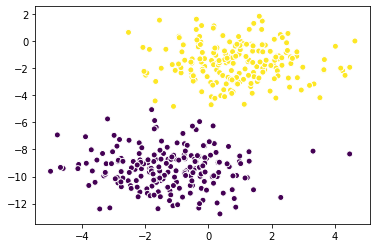

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y, edgecolors='w');

Now, comes the part where we define our logistic model. As mentioned earlier we will create the model with the same structure as the `linear regression model`, the only changes are that instead of creating a linear layer that accepts only one number we will set it to accept a vector of 2 numbers and it will return 1 number as the output.\
`torch.nn.Linear(1, 1) -> torch.nn.Linear(2, 1)`\
Also in the forward pass instead of returning the `y_hat` we will use the `sigmoid function` on the `y_hat` and return that result.\
`torch.sigmoid(y_hat)`

In [ ]:
class LogisticRegression(torch.nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(2, 1)

  def forward(self, x):
    y_hat = self.linear(x)
    return torch.sigmoid(y_hat)

Define an optimizer for updating the `weight` and `bias` and also define a loss function. We mentioned earlier that we are going to use `binary cross-entropy`. 

In [ ]:
model = LogisticRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = torch.nn.BCELoss()

We will train our model `1000` times. Note, you can change this number and experiment with it, we are choosing this number arbitrarily. The first step to training a model is to do some predictions, so we will do the forward pass by passing the `x_torch` we defined in the model. After this step, we calculate the loss using the `criterion` and then do the backpropagation step using `.backward()` on the loss. Update the parameters, `.step()` and reset the gradients, `.zero_grad()`.

In [ ]:
all_loss = []

for epoch in range(5000):
  y_hat = model(x_torch)

  loss = criterion(y_hat, y_torch)
  all_loss.append(loss.item())
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

In [ ]:
plt.plot(all_loss)

If we want to check the values for the calculated parameters we can access them in the `model.named_paramters()`. We can see that there are `2 weight` parameters now and one `bias`.

In [ ]:
for name, parameter in model.named_parameters():
  print(name, parameter)

linear.weight Parameter containing:
tensor([[0.6484, 0.7329]], requires_grad=True)
linear.bias Parameter containing:
tensor([3.4467], requires_grad=True)


We will use the `model.forward()` function to do some predictions on the `x_torch` values.

In [ ]:
y_pred = model.forward(x_torch)

If we check the values of `y_pred`, we can see that they are ranging from 0 to 1, when we want them to be 0 or 1, depending on if they are bigger than 0.5 or less.

In [ ]:
print(y_pred[:10])

tensor([[0.0810],
        [0.7633],
        [0.9589],
        [0.0122],
        [0.0078],
        [0.1117],
        [0.0104],
        [0.0062],
        [0.9626],
        [0.9447]], grad_fn=<SliceBackward>)


We can use the `np.where` function and pass in the values of `y_pred` and make a conditional statement, `y_pred < 0.5`. If this value is `True` we set it to be `0` else we set it to `1`.

In [ ]:
test = np.where(y_pred.detach().numpy() < 0.5, 0, 1)
print(test[:10])

[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]


We can then plot these values and color them depending on their class.

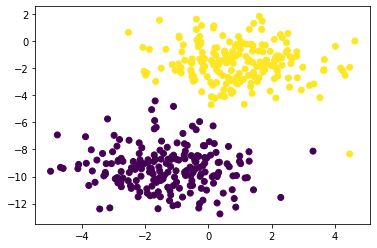

In [ ]:
plt.scatter(x_torch[:, 0], x_torch[:, 1], c=test)